Question 1

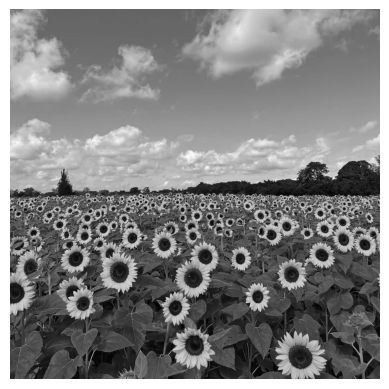

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('the_berry_farms_sunflower_field.jpeg' ,0)
# Check if image is loaded fine
if im is None:
    print('Error opening image!')
    exit(0)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
im.shape

(1440, 1440)

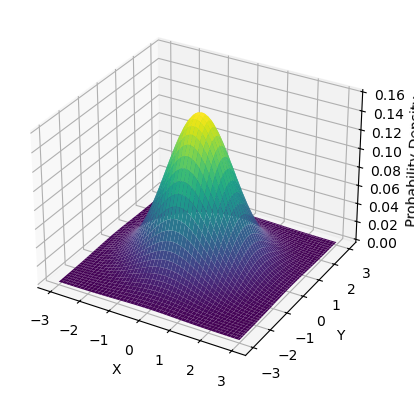

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian formula (height = probability density)
Z = np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.show()

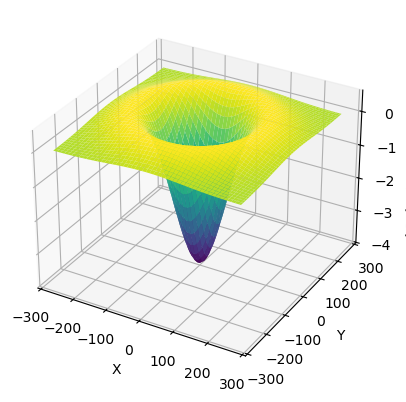

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
sgm=90
x = np.linspace(-3*sgm, 3*sgm, 100)
y = np.linspace(-3*sgm, 3*sgm, 100)
X, Y = np.meshgrid(x, y)


# 2D Laplacian of gaussian formula
LoG = -1*sgm**2/(np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, LoG, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Laplacian of Gaussian')
plt.show()

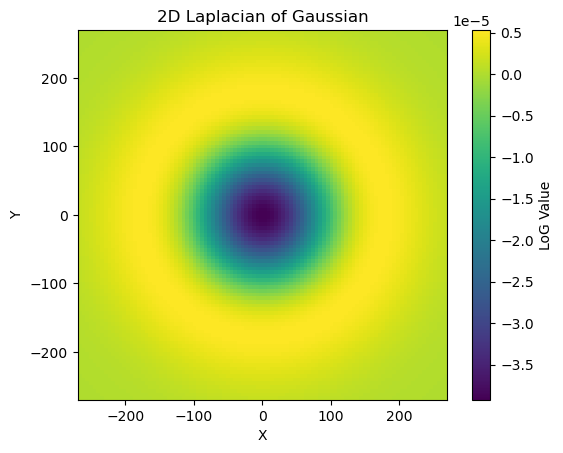

In [10]:
plt.imshow(LoG, extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.colorbar(label='LoG Value')
plt.title('2D Laplacian of Gaussian')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


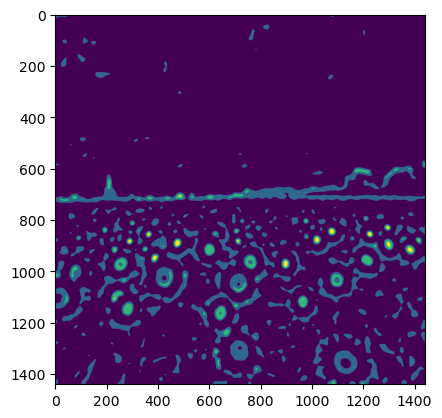

In [11]:
sgm=60
LoG = -1*sgm**2/(np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))

plt.imshow(cv.filter2D(im, -1, LoG))

In [19]:
filter_images = []
for i in range(10, 80, 1):
    sgm = i
    LoG = -1 * sgm**2 / (np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))
    p = cv.filter2D(im, -1, LoG)
    filter_images.append(p)





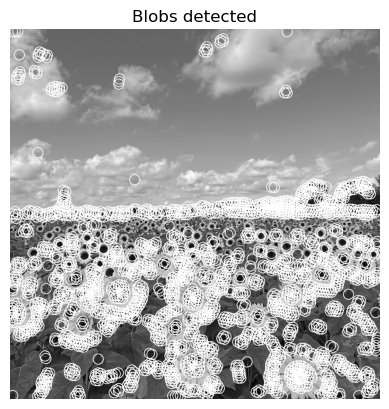

In [ ]:
from skimage.feature import blob_log
import numpy as np

# Use Laplacian of Gaussian blob detector with overlap suppression
last_filtered = filter_images[-1]

# blob_log returns (y, x, sigma) for each detected blob
blobs = blob_log(last_filtered, min_sigma=2, max_sigma=60, num_sigma=30, threshold=0.02, overlap=0.5)

# Compute radii from sigma: r = sqrt(2) * sigma
if blobs.size > 0:
    radii = np.sqrt(2) * blobs[:, 2]
else:
    radii = []

# Convert grayscale image to BGR for colored drawing
im_with_circles = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

if blobs.size == 0:
    print('No blobs detected')
else:
    for (y, x, s), r in zip(blobs, radii):
        cv.circle(im_with_circles, (int(x), int(y)), int(r), (0, 0, 255), 2)

plt.figure(figsize=(10,8))
plt.imshow(cv.cvtColor(im_with_circles, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blobs detected (LoG) - overlap suppressed')
plt.show()